## Goal

The goal of this notebook is to qualitatively validate the initialization models that were developed in order to 
make reasonable predictions when person objects are missing information (eg kaiser person objects are missing waist).

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

desktopDir = "/Users/deligkaris.1/Desktop"
microsimDir = "/Users/deligkaris.1/OneDrive - The Ohio State University Wexner Medical Center/MICROSIM/CODE/microsim"
dataDir = "/Users/deligkaris.1/OneDrive - The Ohio State University Wexner Medical Center/MICROSIM/NOTEBOOKS/DATA"
os.chdir(microsimDir)

from microsim.population_factory import PopulationFactory
from microsim.person_factory import PersonFactory
from microsim.risk_factor import DynamicRiskFactorsType, StaticRiskFactorsType

In [47]:
popSize = 100000
year = 2017
imr = PersonFactory.initialization_model_repository()
pop = PopulationFactory.get_nhanes_population(n=popSize, year=year, personFilters=None, nhanesWeights=True, 
                                              distributions=False, customWeights=None)

### Validate qualitatively the alcohol prevalence model

In [48]:
alcoholPredicted = list(map(lambda x: imr[DynamicRiskFactorsType.ALCOHOL_PER_WEEK].estimate_next_risk(x).value, pop._people))
alcohol = list(map(lambda x: getattr(x, "_"+DynamicRiskFactorsType.ALCOHOL_PER_WEEK.value)[0].value, pop._people))

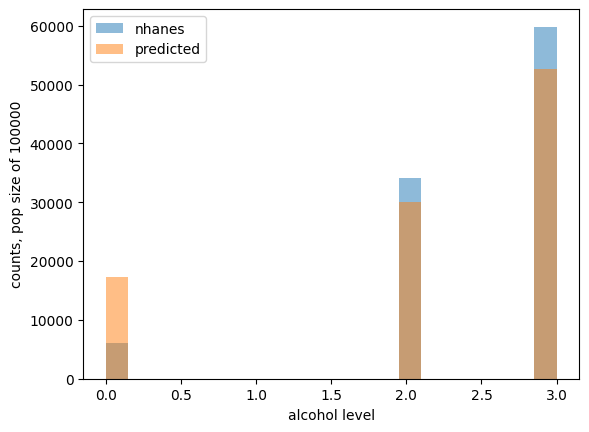

In [49]:
plt.hist(alcohol, bins=20, alpha=0.5, label="nhanes") 
plt.hist(alcoholPredicted, bins=20, alpha=0.5, label="predicted")
plt.xlabel("alcohol level")
plt.ylabel(f"counts, pop size of {popSize}")
plt.legend()
plt.show()

### Validate qualitatively the education prevalence model

In [50]:
educationPredicted = list(map(lambda x: imr[StaticRiskFactorsType.EDUCATION].estimate_next_risk(x).value, pop._people))
education = list(map(lambda x: getattr(x, "_"+StaticRiskFactorsType.EDUCATION.value).value, pop._people))

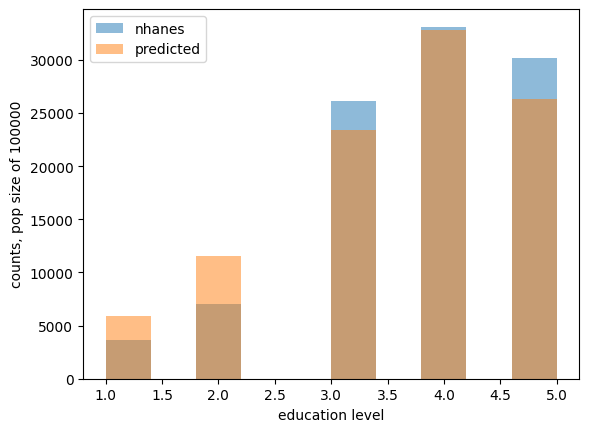

In [51]:
plt.hist(education, alpha=0.5, label="nhanes") 
plt.hist(educationPredicted, alpha=0.5, label="predicted")
plt.xlabel("education level")
plt.ylabel(f"counts, pop size of {popSize}")
plt.legend()
plt.show()

### Validate qualitatively the waist prevalence model

In [52]:
waistPredicted = list(map(lambda x: imr[DynamicRiskFactorsType.WAIST].estimate_next_risk(x), pop._people))
waist = list(map(lambda x: getattr(x, "_"+DynamicRiskFactorsType.WAIST.value)[0], pop._people))

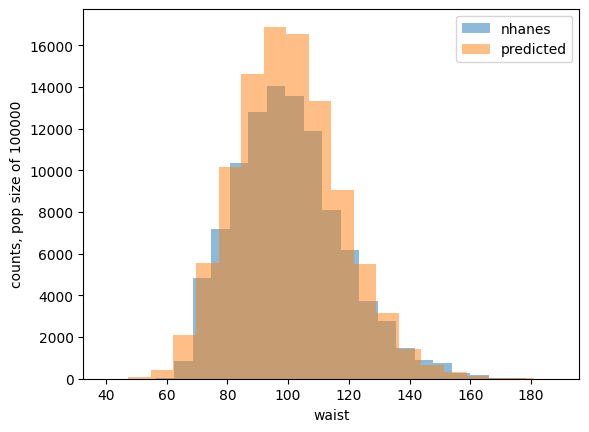

In [53]:
plt.hist(waist, bins=20, alpha=0.5, label="nhanes") 
plt.hist(waistPredicted, bins=20, alpha=0.5, label="predicted")
plt.xlabel("waist")
plt.ylabel(f"counts, pop size of {popSize}")
plt.legend()
plt.show()